# Zadanie 6

Celem ćwiczenia jest implementacja algorytmu Q-learning.

Następnie należy stworzyć agenta rozwiązującego problem [Taxi](https://gymnasium.farama.org/environments/toy_text/taxi/). Problem dostępny jest w pakiecie **gym**.

Punktacja (max 8 pkt):
- Implementacja algorytmu Q-learning. [3 pkt]
- Eksperymenty dla różnych wartości hiperparametrów [2 pkt]
- Jakość kodu [1.5 pkt]
- Wnioski [1.5 pkt]


In [52]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
env = gym.make('Taxi-v3', render_mode="ansi").env

In [53]:
class QLearningSolver:
    """Class containing the Q-learning algorithm
     that might be used for different discrete environments."""

    def __init__(self,
                 observation_space: int,
                 action_space: int,
                 learning_rate: float = 0.1,
                 gamma: float = 0.9,
                 epsilon: float = 1,
                 epsilon_mult=0.99,
                 epsilon_min=0.01
                 ):
        self.observation_space = observation_space
        self.action_space = action_space
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.epsilon = epsilon

        self.epsilon_mult = epsilon_mult
        self.epsilon_min = epsilon_min

        self.Q = np.zeros((observation_space.n, action_space.n))

    def __call__(self, state: int, action: int) -> np.ndarray:
        """Return Q-value of given state and action."""
        return self.Q[state, action]

    def update(self, state: int, action: int, reward: float, nextState: int) -> None:
        """Update Q-value of given state and action."""
        current = self.Q[state, action]
        next_best = np.max(self.Q[nextState])
        new = current + self.learning_rate * \
            (reward+self.gamma*next_best - current)
        self.Q[state, action] = new

    def get_best_action(self, state: int) -> np.ndarray:
        """Return action that maximizes Q-value for a given state."""
        return np.argmax(self.Q[state])

    def update_epsilon(self):
        self.epsilon = max(self.epsilon*self.epsilon_mult, self.epsilon_min)

In [54]:
from typing import Tuple


def TrainedSolver(episodeCount : int,
                lrate : float,
                gamma : float,
                epsilon: float,
                epsilon_mult,
                epsilon_min, verbose=False) -> Tuple[QLearningSolver,np.ndarray]:

    max_steps = 10000
    penalty_data = []
    qsolver = QLearningSolver(env.observation_space, env.action_space, lrate, gamma, epsilon, epsilon_mult, epsilon_min)
    for e in range(episodeCount):
        qsolver.update_epsilon()
        state, info = env.reset()
        counter = 0
        penalty_sum = 0
        while counter < max_steps:
            # select random sometimes
            if np.random.rand() < qsolver.epsilon:
                selectedAction = env.action_space.sample(info["action_mask"])
            else:
                selectedAction = qsolver.get_best_action(state)

            nextState, r, finished, truncated, info = env.step(selectedAction)
            qsolver.update(state, selectedAction, r, nextState)

            state = nextState
            counter += 1
            penalty_sum += r

            if finished:  # terminalny
                if verbose:
                    print("finished", e, counter)
                    print("penalty:", penalty_sum)
                    print(env.render())
                penalty_data.append(penalty_sum)
                break
    return qsolver,penalty_data

# Eksperymenty

Group Wpływ gammy
Experiment: lrate: 0.1, γ: 0.9,initial ε: 0.5, ε mult:80.0%, ε min: 0
Final average cost: -97.79292929292929
Experiment: lrate: 0.1, γ: 0.8,initial ε: 0.5, ε mult:80.0%, ε min: 0
Final average cost: -101.8040404040404
Experiment: lrate: 0.1, γ: 0.7,initial ε: 0.5, ε mult:80.0%, ε min: 0
Final average cost: -106.33636363636364
Experiment: lrate: 0.1, γ: 0.6,initial ε: 0.5, ε mult:80.0%, ε min: 0
Final average cost: -114.84646464646465


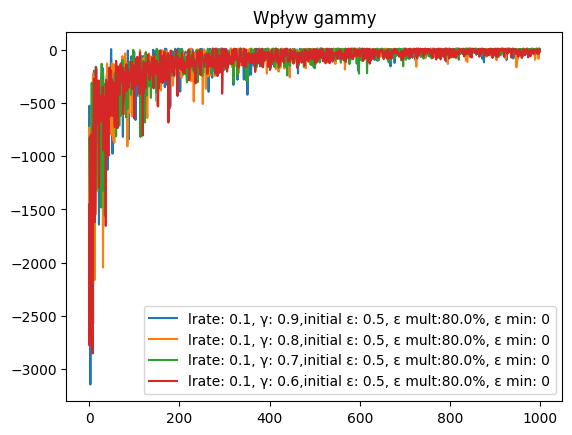

Group Wpływ learning rate
Experiment: lrate: 0.1, γ: 0.9,initial ε: 0.5, ε mult:80.0%, ε min: 0
Final average cost: -99.37878787878788
Experiment: lrate: 0.01, γ: 0.9,initial ε: 0.5, ε mult:80.0%, ε min: 0
Final average cost: -488.3808080808081
Experiment: lrate: 0.2, γ: 0.9,initial ε: 0.5, ε mult:80.0%, ε min: 0
Final average cost: -53.55050505050505
Experiment: lrate: 0.5, γ: 0.9,initial ε: 0.5, ε mult:80.0%, ε min: 0
Final average cost: -25.36060606060606


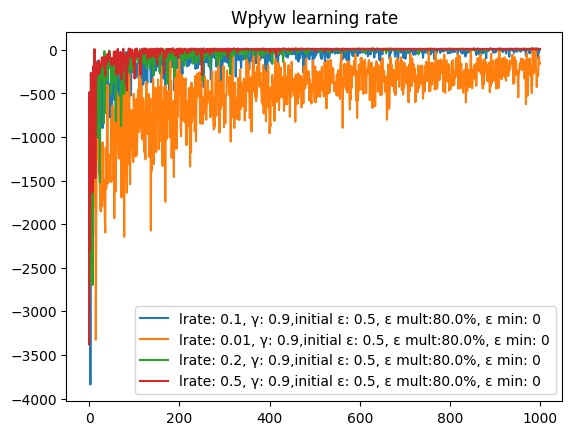

Group Wpływ epsilona
Experiment: lrate: 0.1, γ: 0.9,initial ε: 0.5, ε mult:80.0%, ε min: 0.1
Final average cost: -101.33333333333333
Experiment: lrate: 0.1, γ: 0.9,initial ε: 0.5, ε mult:80.0%, ε min: 0
Final average cost: -102.45151515151515
Experiment: lrate: 0.1, γ: 0.9,initial ε: 0.5, ε mult:100%, ε min: 0
Final average cost: -131.5090909090909
Experiment: lrate: 0.1, γ: 0.9,initial ε: 0.5, ε mult:50.0%, ε min: 0
Final average cost: -99.2
Experiment: lrate: 0.1, γ: 0.9,initial ε: 0.3, ε mult:100%, ε min: 0
Final average cost: -110.04646464646464
Experiment: lrate: 0.1, γ: 0.9,initial ε: 0.1, ε mult:100%, ε min: 0
Final average cost: -101.88181818181818


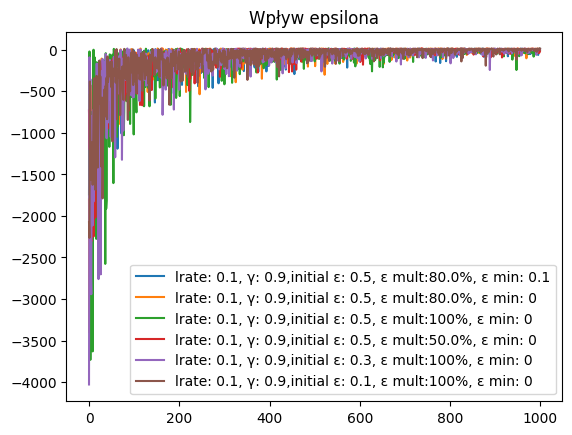

Group Różne
Experiment: lrate: 0.5, γ: 0.9,initial ε: 0.5, ε mult:80.0%, ε min: 0.1
Final average cost: -27.033333333333335
Experiment: lrate: 0.6, γ: 0.9,initial ε: 0.6, ε mult:70.0%, ε min: 0.1
Final average cost: -23.18080808080808
Experiment: lrate: 0.6, γ: 0.001,initial ε: 0.6, ε mult:70.0%, ε min: 0.1


KeyboardInterrupt: 

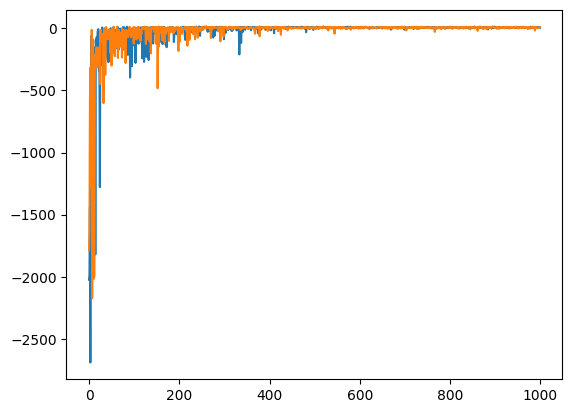

In [56]:
class Experiment():
    def __init__(self, episodeCount, lrate, g, epsilon, epsilonMult, epsilonMin) -> None:
        self.ec = episodeCount
        self.lrate = lrate
        self.gamma = g
        self.epsilon = epsilon
        self.emult = epsilonMult
        self.emin = epsilonMin

        self._initialEpsilon = epsilon

    def __str__(self):
        #Episodes: {self.ec}, 
        return f"lrate: {self.lrate}, γ: {self.gamma},initial ε: {self._initialEpsilon}, ε mult:{self.emult*100}%, ε min: {self.emin}"

    def data(self):
        return self.ec,self.lrate,self.gamma,self.epsilon,self.emult,self.emin

gammaExperiments =  [
    Experiment(1000,0.1,0.9,0.5,0.8,0),
    Experiment(1000,0.1,0.8,0.5,0.8,0),
    Experiment(1000,0.1,0.7,0.5,0.8,0),
    Experiment(1000,0.1,0.6,0.5,0.8,0)
]

rateExperiments = [
    Experiment(1000,0.1,0.9,0.5,0.8,0),
    Experiment(1000,0.01,0.9,0.5,0.8,0),
    Experiment(1000,0.2,0.9,0.5,0.8,0),
    Experiment(1000,0.5,0.9,0.5,0.8,0)
]

epsilonExperiments = [
    Experiment(1000,0.1,0.9,0.5,0.8,0.1),
    Experiment(1000,0.1,0.9,0.5,0.8,0),
    Experiment(1000,0.1,0.9,0.5,1,0),
    Experiment(1000,0.1,0.9,0.5,0.5,0),
    Experiment(1000,0.1,0.9,0.3,1,0),
    Experiment(1000,0.1,0.9,0.1,1,0),
]

misc = [
    Experiment(1000,0.5,0.9,0.5,0.8,0.1),
    Experiment(1000,0.6,0.9,0.6,0.7,0.1),
    Experiment(1000,0.6,0.1,0.6,0.7,0.1),

]


experimentGroups = [("Wpływ gammy", gammaExperiments),
                    ("Wpływ learning rate",rateExperiments),
                    ("Wpływ epsilona",epsilonExperiments),
                    ("Różne",misc)]

#experimentGroups = [("r",misc)]
for title,experiments in experimentGroups:
    print("Group",title)
    for exp in experiments:
        print("Experiment:",exp)
        solver,values = TrainedSolver(*exp.data())
        print("Final average cost:", np.average(values[:-10]))
        plt.plot(values, label=exp) 

    plt.legend()
    plt.title(title)
    plt.show()



## Przykładowe uruchomienie

In [61]:
from time import sleep
env2 = gym.make('Taxi-v3', render_mode="human").env
qsolver,_ = TrainedSolver(10000,0.5,0.9,0.5,0.8,0.1)
def Example():
    while True:
        state, stuff = env2.reset()
        finished = False
        while not finished:
            act = qsolver.get_best_action(state)
            state, _, finished, finished2,  _ = env2.step(act)
            sleep(0.3)

Example()

KeyboardInterrupt: 

# Wnioski

Hiperparametry nie są aż tak ważne jak w przypadku sieci neuronowej, tak długo jak pozostają sensowne (na przyklad zerowe learning rate albo gamma, wtedy niczego się nie uczy).

Zastanawiało mnie, dlaczego są dwa parametry związane z szybkością uczenia, learning rate i gamma,
więc zobaczyłem co się stanie, gdy zamienimy je miejscami, i w sumie dużo się nie dzieje, nadal wszystko działa

Doszedłem też do wniosku, że w tym problemie wysoki learning rate jest dobry, nawet ponad 0.5

Również dodałem stopniowy upływ epsilona, aby na początku zincentywizować poznawanie świata ,a w dalszym uczeniu poleganie coraz bardziej na wiedzy, osiąga to jeszcze lepsze efekty.

Całkowicie wystarczająca ilość epizodów to +- 10000, wtedy średnia suma rewardów dla epizoda jest nawet powyżej 4 (znaczy że średnio rozwiązuje zadanie w 15 ruchów)
